In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer

In [2]:
import pandas as pd
import numpy as np

In [70]:
cfg = {}
cfg['alg1']  = [0.2,0.01] #[mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.23,0.05]
cfg['alg4']  = [0.24,0.01]
cfg['alg5']  = [0.24,0.01]
h0 = list(cfg.keys())

In [71]:
ms = MeasurementsSimulator(cfg, 'normal',seed=1459) 
ms.measure(20,1)

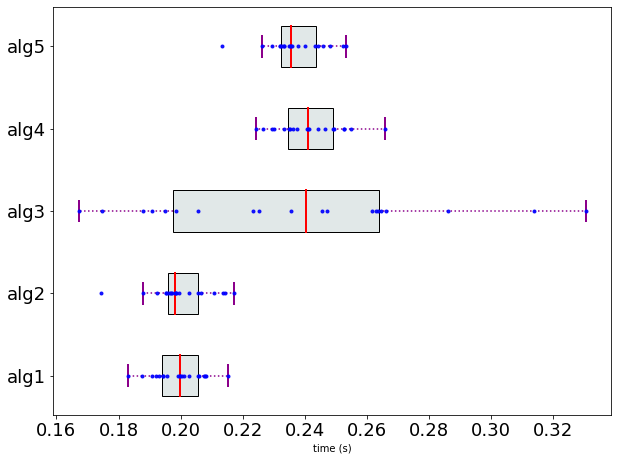

In [72]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=18)

In [73]:
fig.savefig("counter-1.pdf", format="pdf", bbox_inches="tight")

In [74]:
cfg = {}
cfg['alg1']  = [0.2,0.04] #[mean, std]
cfg['alg2']  = [0.21,0.03]
cfg['alg3']  = [0.22,0.02]
cfg['alg4']  = [0.235,0.01]
cfg['alg5']  = [0.245,0.005]
h0 = list(cfg.keys())

In [75]:
ms = MeasurementsSimulator(cfg, 'normal',seed=1459) 
ms.measure(20,1)

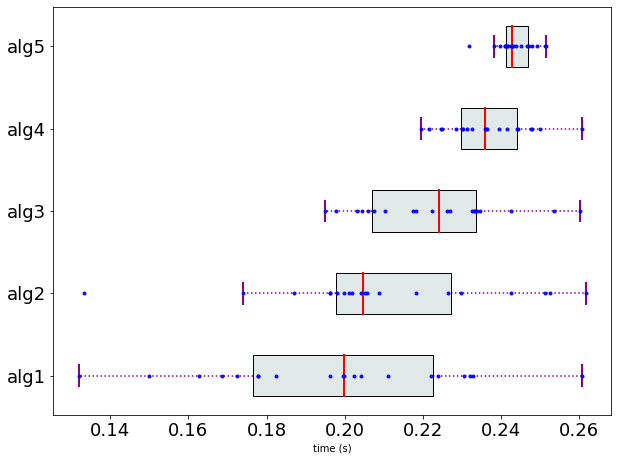

In [76]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=18)

In [77]:
fig.savefig("counter-2.pdf", format="pdf", bbox_inches="tight")